# Case Study: Traffic Data Analysis


### Project: King Street Transit Pilot
<img src='https://www.toronto.ca/wp-content/uploads/2019/06/9748-SPER-3866-04-1024x338.jpg' width=600>

The King Street Transit Pilot, also known as the "The King Street Transit Priority Corridor" is a project in the City of Toronto that aims to reduce traffic by diverting car traffic so that streetcars can go faster and other forms of transportation (cyclists, pedestrians) can safely increase, while making the area more of a "place" and not just a road.

Here's an image of the new street design:

<img src='https://www.toronto.ca/wp-content/uploads/2019/06/96b4-25-March-2019-KSP-Curb-Lane-Uses-FINAL-01-1024x360.png' width=600>

- Cars must turn right when they reach the boundaries of the area (Bathurst on the left or Jarvis on the right)
- There are some designated loading zones and taxi stands (they do **NOT** allow Uber/Lyft to use the taxi stands)
- There are curb lane cafe's (patios)
- There are TTC stops for the streetcar that goes east-west
- No street parking

I encourage you to visit this [neighbourhood](https://www.google.ca/maps/dir/Jarvis+Street+%26+King+Street+East,+Toronto,+ON/Bathurst+St+%26+King+St+W,+Toronto,+ON+M5V+2P9/@43.6474672,-79.3967461,14.94z/data=!4m14!4m13!1m5!1m1!1s0x89d4cb31aad1e4f3:0xa100366e19da353f!2m2!1d-79.3719073!2d43.6504761!1m5!1m1!1s0x882b34dfd4de979d:0xe18df58b063573c2!2m2!1d-79.4026703!2d43.6439035!3e2) if you are ever in the area. Here are the [rules depending on your type of transit](https://www.toronto.ca/city-government/planning-development/planning-studies-initiatives/king-street-pilot/how-to-use-the-king-street-transit-pilot/) (car/TTC/bicycle).


The pilot project was launched on November 12, 2017 and ran for about a year before the changes were made permanent in 2019.

The city collected traffic data before and after the pilot project launched, so they could determine the impact on traffic (positive or negative). Data was collected using cameras at 31 intersections in the corridor. They also [released dashboards periodically](https://www.toronto.ca/city-government/planning-development/planning-studies-initiatives/king-street-pilot/data-reports-background-materials/) to show the public how the project was going.

### Analysis Questions
What was the impact of this pilot project on private vehicle traffic, and is it significant?

**We're going to analyze this data and determine the answer to this question!**

---

## Course Assignment

### Assignment Questions:

Answer the following question **Did traffic get better or worse?** on the following slices of the data
- Weekdays from **Yonge to Jarvis**
- Weekends from **Jarvis to Parliament**

Calculate the travel times in your analysis in **minutes**, not **seconds**.

You will be graded for completeness. If you follow the necessary steps, you will get full marks.

### Submission
- Submit a Jupyter/Colab Notebook by sharing your saved copy of this Notebook with Adnan (adnan.rahman@weclouddata.com)
- Your submission should include all your calculation steps and an answer to the question: **"Did traffic get better or worse after the pilot?"**

---

# Assignment Solution:

## Importing and Exploring the Data

[Travel Time Line Segments](https://open.toronto.ca/dataset/king-st-transit-pilot-bluetooth-travel-time-segments/)

[Travel Time Data](https://open.toronto.ca/dataset/king-st-transit-pilot-detailed-bluetooth-travel-time/)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
travel_times_url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/e05188e5-7af8-426a-8080-942437526a16/resource/c0047fbc-73f2-40e6-8490-195c26195002/download/detailed-bluetooth-travel-time-2017.gz'

travel_times = pd.read_csv(travel_times_url)

travel_times.iloc[:5]

,result_id,datetime_bin,day_type,category,period_name,tt,obs
0,CO_BA_CO_UN,2017-09-21 00:15:00,Weekday,Baseline,NaN,318.0,1
1,CO_BA_CO_UN,2017-09-21 00:55:00,Weekday,Baseline,NaN,225.0,1
2,CO_BA_CO_UN,2017-09-21 01:10:00,Weekday,Baseline,NaN,193.0,1
3,CO_BA_CO_UN,2017-09-21 01:40:00,Weekday,Baseline,NaN,224.0,1
4,CO_BA_CO_UN,2017-09-21 01:45:00,Weekday,Baseline,NaN,275.0,1


Uh-oh! We have a problem. Reading through the README file, we see that the result_id column represents a segment of road, but those codes are not readible. We need to translate those codes so we can extract the data for the segment we're interested in (**Yonge to Jarvis, Jarvis to Parliament**). To do that, we need to look at the GeoJSON data.

**We need to install a library to do that!**

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd

In [ ]:
# GeoJSON file that describes the segments
url_seg = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b24095b2-8c2f-43d9-a257-b351c61432a6/resource/12f52800-9435-4c30-b38f-076b4dfedb32/download/bluetooth-travel-time-segments-geojson.geojson'

df_places = gpd.read_file(url_seg)

df_places.head()


 # ⭐ Q1: Traffics from Yonge to Jarvis on Weekdays

### Data Filtering

Now we're going to use conditional indexing to find the segment name that goes from Yonge to Jarvis.

In [ ]:
# Yonge to Jarvis
df1 = df_places[df_places['street'] == 'King']

df2 = df1[df1['direction'] == 'EB']

df3 = df2[df2['from_intersection'] == 'Yonge']

df3

,segment_name,street,direction,from_intersection,to_intersection,length,geometry
110,KN_YO_KN_JA,King,EB,Yonge,Jarvis,509,"MULTILINESTRING ((-79.37792 43.64915, -79.3767..."


The segment name we want to use is KN_YO_KN_JA. Let's use that to filter our data using more conditional indexing.

In [ ]:
yonge_jarvis = travel_times[travel_times['result_id'] == 'KN_YO_KN_JA']
yonge_jarvis.head()

,result_id,datetime_bin,day_type,category,period_name,tt,obs
552151,KN_YO_KN_JA,2017-09-21 00:05:00,Weekday,Baseline,NaN,50.0,1
552152,KN_YO_KN_JA,2017-09-21 00:20:00,Weekday,Baseline,NaN,77.0,1
552153,KN_YO_KN_JA,2017-09-21 00:25:00,Weekday,Baseline,NaN,129.0,1
552154,KN_YO_KN_JA,2017-09-21 00:35:00,Weekday,Baseline,NaN,99.5,2
552155,KN_YO_KN_JA,2017-09-21 00:45:00,Weekday,Baseline,NaN,115.0,2


Now let's describe our current dataset.

In [ ]:
yonge_jarvis.describe(include='all')

,result_id,datetime_bin,day_type,category,period_name,tt,obs
count,7120,7120,7120,7120,5554,7120.000000,7120.000000
unique,1,7120,2,3,6,NaN,NaN
top,KN_YO_KN_JA,2017-09-21 00:05:00,Weekday,Baseline,Midday,NaN,NaN
freq,7120,1,5292,3878,1571,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,125.393469,1.324017
std,NaN,NaN,NaN,NaN,NaN,74.729945,0.649537
min,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,82.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,110.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,151.000000,1.000000


Let's analyze what the unique values are in each of our columns.

In [ ]:
yonge_jarvis['day_type'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [ ]:
yonge_jarvis['category'].unique()

array(['Baseline', 'Excluded', 'Pilot'], dtype=object)

In [ ]:
yonge_jarvis['period_name'].unique()

array([nan, 'AM Peak', 'Midday', 'PM Peak', 'Evening', 'Morning',
       'Afternoon'], dtype=object)

### Defining Metrics

In order to conclude whether private vehicle traffic was "better" or "worse", we need to come up with a definition for "better" or "worse"

Some options:
- Average travel time between Yonge and Jarvis
- Average travel time during weekdays
- Median travel time during specific periods

We're going to calculate the average private vehicle travel time during weekdays between Yonge and Jarvis (Eastbound), ***before (baseline)*** and ***after (pilot)
***  the pilot.

### Data Cleaning

In this context, data cleaning means we're going to:
- Get rid of missing data or erroneous data
- Filter to include only the data we want to analyze
- Aggregate the data to make the analysis simpler
- Calculate our metrics


First, we are going to filter the day type - only for weekdays

In [ ]:
yonge_jarvis['day_type']

552151    Weekday
552152    Weekday
552153    Weekday
552154    Weekday
552155    Weekday
           ...   
559266    Weekend
559267    Weekend
559268    Weekend
559269    Weekend
559270    Weekend
Name: day_type, Length: 7120, dtype: object

In [ ]:
yonge_jarvis['day_type'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [ ]:
yonge_jarvis = yonge_jarvis[yonge_jarvis['day_type'] != 'Weekend']

Now, there should be no more "Weekend" day type in the dataset:

In [ ]:
yonge_jarvis['day_type'].unique()

array(['Weekday'], dtype=object)

Second, we are going to drop missing data - any data where the 'period_name' column is null. To do that, we will use the Pandas DataFrame [dropna() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).

In [ ]:
yonge_jarvis = yonge_jarvis.dropna(subset=['day_type'])

Third, we're going to slice the data to include only the data from either the "Baseline" or "Pilot" categories. We're going to use conditional indexing to do this. Recall that:

In [ ]:
yonge_jarvis['category'].unique()

array(['Baseline', 'Excluded', 'Pilot'], dtype=object)

In [ ]:
yonge_jarvis = yonge_jarvis[yonge_jarvis['category'] != 'Excluded']

Now, there should be no more "Excluded" category in the dataset:

In [ ]:
yonge_jarvis['category'].unique()

array(['Baseline', 'Pilot'], dtype=object)

Last, we need convert the travel time in the analysis from seconds to minutes 

In [ ]:
yonge_jarvis['tt'] = yonge_jarvis['tt']/60
yonge_jarvis

,result_id,datetime_bin,day_type,category,period_name,tt,obs
552151,KN_YO_KN_JA,2017-09-21 00:05:00,Weekday,Baseline,NaN,0.833333,1
552152,KN_YO_KN_JA,2017-09-21 00:20:00,Weekday,Baseline,NaN,1.283333,1
552153,KN_YO_KN_JA,2017-09-21 00:25:00,Weekday,Baseline,NaN,2.150000,1
552154,KN_YO_KN_JA,2017-09-21 00:35:00,Weekday,Baseline,NaN,1.658333,2
552155,KN_YO_KN_JA,2017-09-21 00:45:00,Weekday,Baseline,NaN,1.916667,2
...,...,...,...,...,...,...,...
559213,KN_YO_KN_JA,2017-12-29 22:25:00,Weekday,Pilot,Evening,0.758333,2
559214,KN_YO_KN_JA,2017-12-29 22:30:00,Weekday,Pilot,Evening,1.783333,1
559215,KN_YO_KN_JA,2017-12-29 22:35:00,Weekday,Pilot,Evening,0.983333,1
559216,KN_YO_KN_JA,2017-12-29 23:15:00,Weekday,Pilot,NaN,1.466667,1


### Data Analysis

Now, let's use Pandas [Groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) to aggregate the data and calculate the mean travel time in seconds.

In [ ]:
compare_summ = yonge_jarvis.groupby(['category', 'day_type']).mean()
compare_summ

,,tt,obs
category,day_type,,
Baseline,Weekday,2.090235,1.447781
Pilot,Weekday,2.276252,1.075614


In [ ]:
compare_summ = yonge_jarvis.groupby(['category', 'day_type']).median()
compare_summ

,,tt,obs
category,day_type,,
Baseline,Weekday,1.916667,1.0
Pilot,Weekday,1.941667,1.0


Separate the data into two dataframes

In [ ]:
compare_summ = compare_summ.reset_index()
compare_summ

,category,day_type,tt,obs
0,Baseline,Weekday,1.916667,1.0
1,Pilot,Weekday,1.941667,1.0


In [ ]:
baseline_result0 = compare_summ.copy()
baseline_result1 = baseline_result0[baseline_result0['category'] == 'Baseline']
baseline_result2 = baseline_result1.set_index('day_type')


baseline_result = compare_summ[compare_summ['category'] == 'Baseline'].copy().set_index('day_type')

pilot_result = compare_summ[compare_summ['category'] == 'Pilot'].copy().set_index('day_type')


In [ ]:
baseline_result

,category,tt,obs
day_type,,,
Weekday,Baseline,1.916667,1.0


In [ ]:
pilot_result

,category,tt,obs
day_type,,,
Weekday,Pilot,1.941667,1.0


In [ ]:
baseline_result['time for pilot'] = pilot_result['tt']
baseline_result

,category,tt,obs,time for pilot
day_type,,,,
Weekday,Baseline,1.916667,1.0,1.941667


In [ ]:
# (new value - old value) / (old value) * 100
baseline_result['pct_diff'] = (baseline_result['time for pilot'] - baseline_result['tt']) / baseline_result['tt'] * 100

In [ ]:
baseline_result

,category,tt,obs,time for pilot,pct_diff
day_type,,,,,
Weekday,Baseline,1.916667,1.0,1.941667,1.304348


### Visualizations

Text(0.5, 1.0, 'Travel Time on Weekdays')

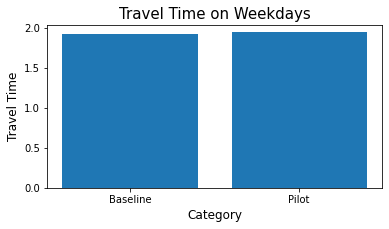

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3)) 

ax.bar(compare_summ['category'], compare_summ['tt']) 

ax.set_xlabel('Category', fontsize = 12) 
ax.set_ylabel('Travel Time', fontsize = 12)

ax.set_title('Travel Time on Weekdays', fontsize=15)

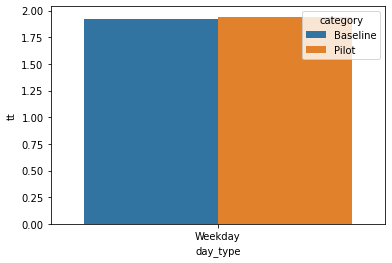

In [ ]:
# fig, ax1 = plt.subplots(figsize=(6, 3))

sns.barplot(data=compare_summ, x='day_type', y='tt', hue='category')

# sns.legend(loc='upper left')

Text(0.5, 0, 'Weekdays')

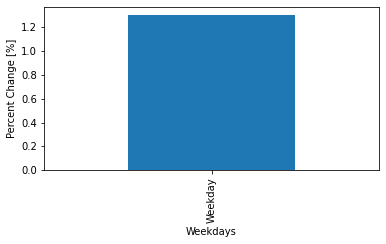

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 3))

baseline_result['pct_diff'].plot(kind='bar', ax=ax1)

ax1.set_ylabel('Percent Change [%]')

ax1.set_xlabel('Weekdays')

# ⭐ Q2: Traffics from Jarvis to Parliament on Weekends

### Data Filtering

Now we're going to use conditional indexing to find the segment name that goes from Jarvis to Parliament.

In [ ]:
# Jarvis to Parliament
df1 = df_places[df_places['street'] == 'King']

df2 = df1[df1['direction'] == 'EB']

df3 = df2[df2['from_intersection'] == 'Jarvis']

df3

,segment_name,street,direction,from_intersection,to_intersection,length,geometry
66,KN_JA_KN_PA,King,EB,Jarvis,Parliament,779,"MULTILINESTRING ((-79.37191 43.65046, -79.3706..."


The segment name we want to use is KN_JA_KN_PA. Let's use that to filter our data using more conditional indexing.

In [ ]:
jarvis_parliament = travel_times[travel_times['result_id'] == 'KN_JA_KN_PA']
jarvis_parliament.head()

,result_id,datetime_bin,day_type,category,period_name,tt,obs
559271,KN_JA_KN_PA,2017-09-21 00:10:00,Weekday,Baseline,NaN,132.0,1
559272,KN_JA_KN_PA,2017-09-21 00:15:00,Weekday,Baseline,NaN,77.0,1
559273,KN_JA_KN_PA,2017-09-21 00:20:00,Weekday,Baseline,NaN,82.0,1
559274,KN_JA_KN_PA,2017-09-21 01:05:00,Weekday,Baseline,NaN,110.0,1
559275,KN_JA_KN_PA,2017-09-21 01:20:00,Weekday,Baseline,NaN,118.0,1


Now let's describe our current dataset.

In [ ]:
jarvis_parliament.describe(include='all')

,result_id,datetime_bin,day_type,category,period_name,tt,obs
count,5178,5178,5178,5178,4165,5178.000000,5178.000000
unique,1,5178,2,3,6,NaN,NaN
top,KN_JA_KN_PA,2017-09-21 00:10:00,Weekday,Baseline,Midday,NaN,NaN
freq,5178,1,3832,2730,1140,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,158.078216,1.219003
std,NaN,NaN,NaN,NaN,NaN,75.486611,0.523663
min,NaN,NaN,NaN,NaN,NaN,23.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,112.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,146.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,187.000000,1.000000


Let's analyze what the unique values are in each of our columns.

In [ ]:
jarvis_parliament['day_type'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [ ]:
jarvis_parliament['category'].unique()

array(['Baseline', 'Excluded', 'Pilot'], dtype=object)

In [ ]:
jarvis_parliament['period_name'].unique()

array([nan, 'AM Peak', 'Midday', 'PM Peak', 'Evening', 'Morning',
       'Afternoon'], dtype=object)

### Defining Metrics

In order to conclude whether private vehicle traffic was "better" or "worse", we need to come up with a definition for "better" or "worse"

Some options:
- Average travel time between Jarvis and Parliament
- Average travel time during weekdays
- Median travel time during specific periods

We're going to calculate the average private vehicle travel time during weekdays between Jarvis and Parliament (Eastbound), ***before (baseline)*** and ***after (pilot)***  the pilot.

### Data Cleaning

In this context, data cleaning means we're going to:
- Get rid of missing data or erroneous data
- Filter to include only the data we want to analyze
- Aggregate the data to make the analysis simpler
- Calculate our metrics


First, we are going to filter the day type - only for weekends

In [ ]:
jarvis_parliament['day_type']

559271    Weekday
559272    Weekday
559273    Weekday
559274    Weekday
559275    Weekday
           ...   
564444    Weekend
564445    Weekend
564446    Weekend
564447    Weekend
564448    Weekend
Name: day_type, Length: 5178, dtype: object

In [ ]:
jarvis_parliament['day_type'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [ ]:
jarvis_parliament = jarvis_parliament[jarvis_parliament['day_type'] != 'Weekday']

Now, there should be no more "Weekday" day type in the dataset:

In [ ]:
jarvis_parliament['day_type'].unique()

array(['Weekend'], dtype=object)

Second, we are going to drop missing data - any data where the 'period_name' column is null. To do that, we will use the Pandas DataFrame [dropna() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).

In [ ]:
jarvis_parliament = jarvis_parliament.dropna(subset=['day_type'])

Third, we're going to slice the data to include only the data from either the "Baseline" or "Pilot" categories. We're going to use conditional indexing to do this. Recall that:

In [ ]:
jarvis_parliament['category'].unique()

array(['Baseline', 'Excluded', 'Pilot'], dtype=object)

In [ ]:
jarvis_parliament = jarvis_parliament[jarvis_parliament['category'] != 'Excluded']

Now, there should be no more "Excluded" category in the dataset:

In [ ]:
jarvis_parliament['category'].unique()

array(['Baseline', 'Pilot'], dtype=object)

Last, we need convert the travel time in the analysis from seconds to minutes 

In [ ]:
jarvis_parliament['tt'] = jarvis_parliament['tt']/60
jarvis_parliament

,result_id,datetime_bin,day_type,category,period_name,tt,obs
559441,KN_JA_KN_PA,2017-09-23 00:30:00,Weekend,Baseline,NaN,1.766667,1
559442,KN_JA_KN_PA,2017-09-23 00:40:00,Weekend,Baseline,NaN,1.533333,1
559443,KN_JA_KN_PA,2017-09-23 00:45:00,Weekend,Baseline,NaN,1.533333,1
559444,KN_JA_KN_PA,2017-09-23 00:55:00,Weekend,Baseline,NaN,1.600000,1
559445,KN_JA_KN_PA,2017-09-23 01:50:00,Weekend,Baseline,NaN,1.116667,1
...,...,...,...,...,...,...,...
564444,KN_JA_KN_PA,2017-12-31 19:30:00,Weekend,Pilot,Evening,2.650000,1
564445,KN_JA_KN_PA,2017-12-31 20:35:00,Weekend,Pilot,Evening,2.150000,1
564446,KN_JA_KN_PA,2017-12-31 21:50:00,Weekend,Pilot,Evening,3.000000,1
564447,KN_JA_KN_PA,2017-12-31 22:20:00,Weekend,Pilot,Evening,2.016667,1


### Data Analysis

Now, let's use Pandas [Groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) to aggregate the data and calculate the mean travel time in seconds.

In [ ]:
compare_summ = jarvis_parliament.groupby(['category', 'day_type']).mean()
compare_summ

,,tt,obs
category,day_type,,
Baseline,Weekend,2.223019,1.188590
Pilot,Weekend,2.953559,1.075521


In [ ]:
compare_summ = jarvis_parliament.groupby(['category', 'day_type']).median()
compare_summ

,,tt,obs
category,day_type,,
Baseline,Weekend,2.116667,1.0
Pilot,Weekend,2.375000,1.0


Separate the data into two dataframes

In [ ]:
compare_summ = compare_summ.reset_index()
compare_summ

,category,day_type,tt,obs
0,Baseline,Weekend,2.116667,1.0
1,Pilot,Weekend,2.375000,1.0


In [ ]:
baseline_result0 = compare_summ.copy()
baseline_result1 = baseline_result0[baseline_result0['category'] == 'Baseline']
baseline_result2 = baseline_result1.set_index('day_type')


baseline_result = compare_summ[compare_summ['category'] == 'Baseline'].copy().set_index('day_type')

pilot_result = compare_summ[compare_summ['category'] == 'Pilot'].copy().set_index('day_type')


In [ ]:
baseline_result

,category,tt,obs
day_type,,,
Weekend,Baseline,2.116667,1.0


In [ ]:
pilot_result

,category,tt,obs
day_type,,,
Weekend,Pilot,2.375,1.0


In [ ]:
baseline_result['time for pilot'] = pilot_result['tt']
baseline_result

,category,tt,obs,time for pilot
day_type,,,,
Weekend,Baseline,2.116667,1.0,2.375


In [ ]:
# (new value - old value) / (old value) * 100
baseline_result['pct_diff'] = (baseline_result['time for pilot'] - baseline_result['tt']) / baseline_result['tt'] * 100

In [ ]:
baseline_result

,category,tt,obs,time for pilot,pct_diff
day_type,,,,,
Weekend,Baseline,2.116667,1.0,2.375,12.204724


### Visualizations

Text(0.5, 1.0, 'Travel Time on Weekends')

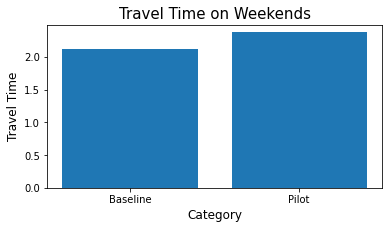

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3)) 

ax.bar(compare_summ['category'], compare_summ['tt']) 

ax.set_xlabel('Category', fontsize = 12) 
ax.set_ylabel('Travel Time', fontsize = 12)

ax.set_title('Travel Time on Weekends', fontsize=15)

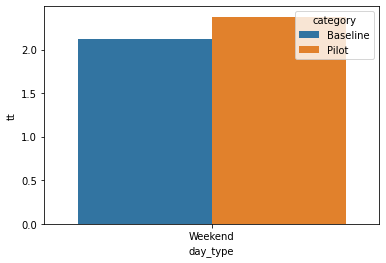

In [ ]:
# fig, ax1 = plt.subplots(figsize=(6, 3))

sns.barplot(data=compare_summ, x='day_type', y='tt', hue='category')

# sns.legend(loc='upper left')

Text(0.5, 0, 'Weekends')

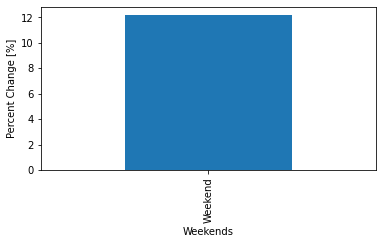

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 3))

baseline_result['pct_diff'].plot(kind='bar', ax=ax1)

ax1.set_ylabel('Percent Change [%]')

ax1.set_xlabel('Weekends')

# ⭐ Conclusion

![picture](https://drive.google.com/uc?id=1NvrnPdcEfzYBbWVZUeND_SosbSg7H86S)

![picture](https://drive.google.com/uc?id=1jMxx_IReWBrMvqkHN2Fuc07symCDVb3f)

**Question: Did traffic get better or worse after the pilot?**

Based on the baseline analysis above, we can certainly say the traffic gets **worse** for private vehicle after "King Street Transit Pilot" . Especially, the effect on travel time for route between Jarvis St and Parliament St is **Significant**. After pilot, the travel time **increases by 12.2%**, which means person who drives their own vehicle would spend **extra 16 seconds** to pass through this specific route. The main reason might be this intersection (King St and Parliament St) is the **first big intersection** after the restricted area. In addtion, this is the main road to enter highway (DVP), so everyone drives back to King St. 